<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring25/color_quantization_china_elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting model on a small sub-sample of the data


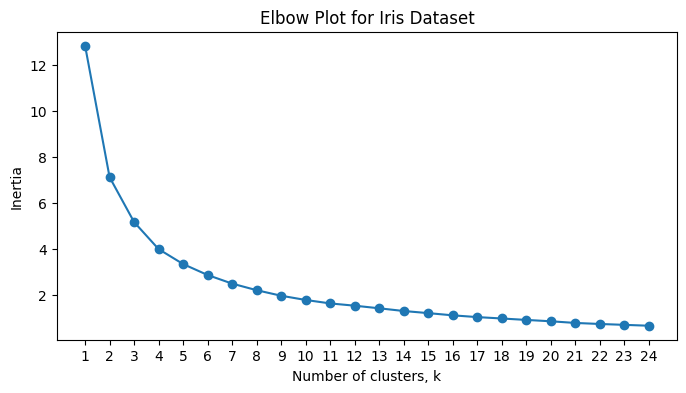

In [ ]:
#Adopted from https://scikit-learn.org/1.5/auto_examples/cluster/plot_color_quantization.html

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=3000)

# Range of k values
num_colors = np.arange(20, 500, 20)
inertias = []

# Compute inertias for different k values
for n_colors in num_colors:
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    inertias.append(kmeans.inertia_)


# Plotting the inertias to visualize the elbow method
plt.figure(figsize=(8, 4))
plt.plot(num_colors/20, inertias, '-o')
plt.xlabel('Number of clusters, k (in units of 20)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Iris Dataset')
plt.xticks(num_colors/20)
plt.show()


Predicting color indices on the full image (k-means)
Predicting color indices on the full image (random)


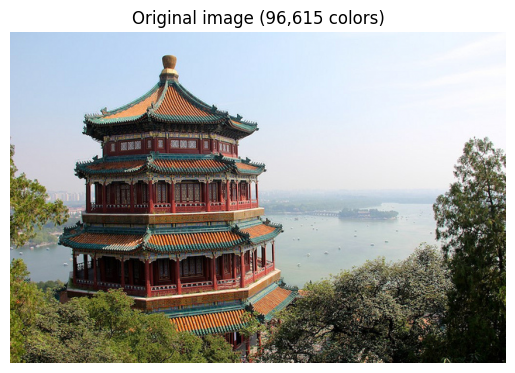

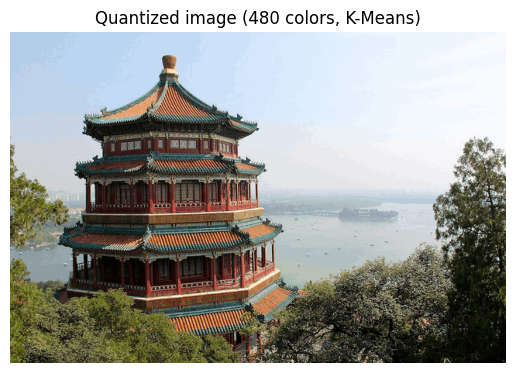

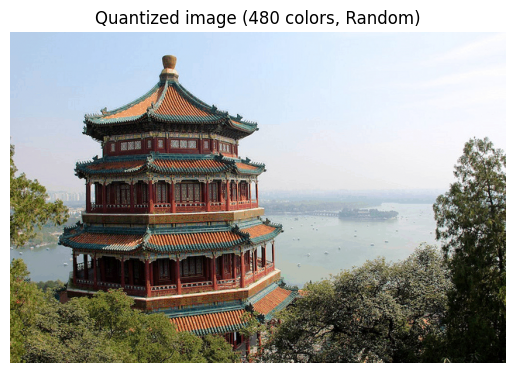

In [ ]:
kmeans = KMeans(n_clusters=140, random_state=0).fit(image_array_sample)

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()
